## Travelling Salesman Problem (TSP)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from random import seed

In [2]:
D = [[0,20,16,25,24],[20,0,12,12,27],
     [16,12,0,10,14],[25,12,10,0,20],
     [24,27,14,20,0]]

In [3]:
Graph = nx.Graph()
nodes = len(D[0])
Graph.add_nodes_from(range(nodes))
for i in range(nodes):
    for j in range(nodes):
        Graph.add_edge(i, j, weight=D[j][i])

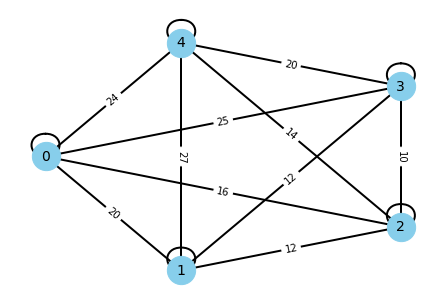

In [4]:
seed(2)
pos=nx.shell_layout(Graph)
draw_params = {'with_labels':True, 
               'node_color':'skyblue', 
               'node_size':800, 'width':2, 
               'font_size':14}
nx.draw(Graph, pos, **draw_params)
labels = nx.get_edge_attributes(Graph, 'weight')
nx.draw_networkx_edge_labels(Graph,pos,
                             edge_labels=labels)
plt.show()

### A brute force solution

In [5]:
from itertools import permutations

best_solution = [None, sum([sum(row) for row in D])]
for solution in list(permutations(range(1, nodes))):
    start, distance = (0, 0)
    for next_one in solution:
        distance += D[next_one][start]
        start = next_one
    distance += D[0][start]
    if distance <= best_solution[1]:
        best_solution = [[0]+list(solution)+[0], distance]
        prt = str(best_solution)[1:-1]
        print(f'Best solution so far: {prt} kms')   

Best solution so far: [0, 1, 2, 3, 4, 0], 86 kms
Best solution so far: [0, 1, 3, 2, 4, 0], 80 kms
Best solution so far: [0, 4, 2, 3, 1, 0], 80 kms


In [6]:
from scipy.special import perm

print(perm(13, 13) / 2) 

3113510400.0


### A dynamic programming solution

In [7]:
from itertools import combinations

memo = {(frozenset([0, idx+1]), idx+1): (dist, [0,idx+1]) 
        for idx,dist in enumerate(D[0][1:])}

cities = nodes
for subset_size in range(2, cities):
    # Here we define the size of the subset of cities
    new_memo = dict()
    for subset in [frozenset(comb) | {0} for comb in
                   combinations(range(1, cities), 
                                subset_size)]:
        # We enumerate the subsets having a certain subset
        # size 
        for ending in subset - {0}:
            # We consider every ending point in the subset
            all_paths = list()
            for k in subset:
                # We check the shortest path for every
                # element in the subset
                if k != 0 and k!=ending:
                    length = memo[(subset-{ending},k)][0
                                        ] + D[k][ending]
                    index  = memo[(subset-{ending},k)][1
                                            ] + [ending]
                    all_paths.append((length, index))
            new_memo[(subset, ending)] = min(all_paths)
    # In order to save memory, we just record the previous
    # subsets since we won't use shorter ones anymore
    memo = new_memo
# Now we close the cycle and get back to the start 
# of the tour, city zero
tours = list()
for distance, path in memo.values():
    distance += D[0][path[-1]]
    tours.append((distance, path + [0]))
# We can now declare the shortest tour
distance, path = min(tours)
print('Shortest dynamic programming tour is:', end=' ') 
print(f'{path}, {distance} kms')

Shortest dynamic programming tour is: [0, 1, 3, 2, 4, 0], 80 kms
